# chapter5

# Support Vector Machines

capable of performing linear or nonlinear classification, regression, and even
outlier detection. 

# Linear SVM Classication



The two
classes can clearly be separated easily with a straight line (they are linearly separable).

the
solid line in the plot on the right represents the decision boundary of an SVM classi‐
fier; this line not only separates the two classes but also stays as far away from the
closest training instances as possible. 

In [13]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

# Soft Margin Classication

If we strictly impose that all instances be off the street and on the right side, this is
called hard margin classification. There are two main issues with hard margin classifi‐
cation. First, it only works if the data is linearly separable, and second it is quite sensi‐
tive to outliers.

To avoid these issues it is preferable to use a more flexible model. The objective is to
find a good balance between keeping the street as large as possible and limiting the
margin violations (i.e., instances that end up in the middle of the street or even on the
wrong side). This is called so margin classification

In Scikit-Learn’s SVM classes, you can control this balance using the C hyperparame‐
ter: a smaller C value leads to a wider street but more margin violations.

If your SVM model is overfitting, you can try regularizing it by
reducing C.


following Scikit-Learn code loads the iris dataset, scales the features, and then
trains a linear SVM model (using the LinearSVC class with C = 1 and the hinge loss
function, described shortly) to detect Iris-Virginica flowers

In [9]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [4]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype('float64') # Iris-Virginica

In [7]:
pp = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1,loss="hinge"))
])

pp.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [8]:
pp.predict([[5.5, 1.7]])

array([1.])

In [33]:
pp.predict([[1.7, 0.4]])

array([0])

1. The LinearSVC class regularizes the bias term, so you should center
the training set first by subtracting its mean. This is automatic if
you scale the data using the StandardScaler. 
2. Moreover, make sure
you set the loss hyperparameter to "hinge", as it is not the default
value. 
3. Finally, for better performance you should set the dual
hyperparameter to False, unless there are more features than
training instances (we will discuss duality later in the chapter)

Unlike Logistic Regression classifiers, SVM classifiers do not out‐
put probabilities for each class.

Alternatively, you could use the SVC class, using SVC(kernel="linear", C=1), but it
is much slower, especially with large training sets, so it is not recommended. Another


option is to use the SGDClassifier class, with SGDClassifier(loss="hinge",
alpha=1/(m*C)). This applies regular Stochastic Gradient Descent (see Chapter 4) to
train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it
can be useful to handle huge datasets that do not fit in memory (out-of-core train‐
ing), or to handle online classification tasks

In [34]:
s = SVC(kernel="linear", C=1)
s.fit(X,y)
s.predict([[1.7, 0.4]])

array([0])

In [35]:
pp = Pipeline([
    ('scaler', StandardScaler()),
    ('svc',SVC(kernel="linear", C=1) )
])

pp.fit(X,y)
pp.predict([[1.7, 0.4]])

array([0])

In [36]:
from sklearn.linear_model import SGDClassifier
sg = SGDClassifier(loss="hinge",alpha=1/(150*1))
sg.fit(X,y)
sg.predict([[1.7, 0.4]])

array([0])

In [37]:
pp = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd',SGDClassifier(loss="hinge",alpha=1/(150*1)) )
])

pp.fit(X,y)
pp.predict([[1.7, 0.4]])

array([0])

# Nonlinear SVM Classication


Although linear SVM classifiers are efficient and work surprisingly well in many
cases, many datasets are not even close to being linearly separable. One approach to
handling nonlinear datasets is to add more features, such as polynomial features in some cases this can result in a linearly separable dataset.


To implement this idea using Scikit-Learn, you can create a Pipeline containing a
PolynomialFeatures transformer (discussed in “Polynomial Regression” on page
130), followed by a StandardScaler and a LinearSVC.

Let’s test this on the moons
dataset: this is a toy dataset for binary classification in which the data points are sha‐
ped as two interleaving half circles

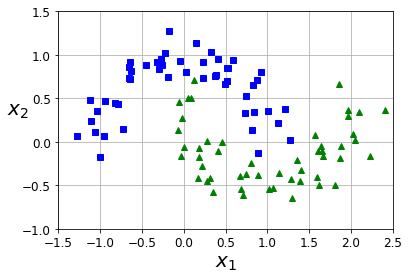

In [38]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()



In [39]:
polynomial_svm_clf = Pipeline([
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ])
polynomial_svm_clf.fit(X, y)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

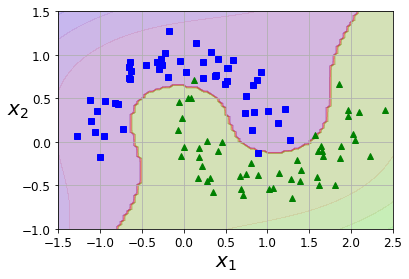

In [41]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


plt.show()

# Polynomial Kernel

1. Adding polynomial features is simple to implement and can work great with all sorts
of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it
cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.
2. Fortunately, when using SVMs you can apply an almost miraculous mathematical
technique called the kernel trick (it is explained in a moment). It makes it possible to
get the same result as if you added many polynomial features, even with very highdegree polynomials, without actually having to add them. So there is no combinato‐
rial explosion of the number of features since you don’t actually add any features. This
trick is implemented by the SVC class. Let’s test it on the moons dataset:

In [43]:
from sklearn.svm import SVC 
pp = Pipeline([
    ("scaler", StandardScaler()),
    ('svc', SVC(kernel="poly", degree=3, coef0=1, C=5))
])
pp.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

The hyperparameter coef0 controls how much the model is influenced by highdegree polynomials versus low-degree polynomi

A common approach to find the right hyperparameter values is to
use grid search (see Chapter 2). It is often faster to first do a very
coarse grid search, then a finer grid search around the best values
found. Having a good sense of what each hyperparameter actually
does can also help you search in the right part of the hyperparame‐
ter space.

SVC()
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

C : float, default=1.0
    Regularization parameter. The strength of the regularization is
    inversely proportional to C. Must be strictly positive. The penalty
    is a squared l2 penalty.

kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
    Specifies the kernel type to be used in the algorithm.
    It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
    a callable.
    If none is given, 'rbf' will be used.

LinearSVC()
Linear Support Vector Classification.

Similar to SVC with parameter kernel='linear', but implemented in terms of
liblinear rather than libsvm, so it has more flexibility in the choice of
penalties and loss functions and should scale better to large numbers of
samples.

This class supports both dense and sparse input and the multiclass support
is handled according to a one-vs-the-rest scheme.

# Adding Similarity Features

In [ ]:
Another technique to tackle nonlinear problems is to add features computed using a
similarity function that measures how much each instance resembles a particular
landmark.

define the similarity function to be the Gaussian Radial Basis Function (RBF)
with γ = 0.3

It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at
the landmark).

If your training set is very large, you end up with an
equally large number of features.

#### Gaussian RBF Kernel


Just like the polynomial features method, the similarity features method can be useful
with any Machine Learning algorithm, but it may be computationally expensive to
compute all the additional features, especially on large training sets. However, once
again the kernel trick does its SVM magic: it makes it possible to obtain a similar
result as if you had added many similarity features, without actually having to add
them. Let’s try the Gaussian RBF kernel using the SVC class:

In [46]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

 1. Increasing
gamma makes the bell-shape curve narrower (see the left plot of Figure 5-8), and as a
result each instance’s range of influence is smaller: the decision boundary ends up
being more irregular, wiggling around individual instances. 

2. a small gamma
value makes the bell-shaped curve wider, so instances have a larger range of influ‐
ence, and the decision boundary ends up smoother. 
3. So γ acts like a regularization
hyperparameter: 
4. if your model is overfitting, you should reduce it, and 
5. if it is under‐
fitting, you should increase it (similar to the C hyperparameter)

conclusion

1. With so many kernels to choose from, how can you decide which
one to use? As a rule of thumb, 
2. you should always try the linear
kernel first (remember that LinearSVC is much faster than SVC(ker
nel="linear")), especially if the training set is very large or if it
has plenty of features. 
3. If the training set is not too large, you should
try the Gaussian RBF kernel as well; it works well in most cases.

# computational comparision

1. The LinearSVC class is based on the liblinear library, which implements an optimized
algorithm for linear SVMs.1
2. It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features: its training
time complexity is roughly O(m × n).
3. The algorithm takes longer if you require a very high precision. This is controlled by
the tolerance hyperparameter ϵ (called tol in Scikit-Learn). In most classification
tasks, the default tolerance is fine.


1. The SVC class is based on the libsvm library, which implements an algorithm that sup‐
ports the kernel trick.2
 The training time complexity is usually between O(m2
 × n)
and O(m3
 × n). 
2. Unfortunately, this means that it gets dreadfully slow when the num‐
ber of training instances gets large (e.g., hundreds of thousands of instances). This
3. algorithm is perfect for complex but small or medium training sets. 
4. However, it scales
well with the number of features, especially with sparse features (i.e., when each
instance has few nonzero features).

# SVM Regression

1. SVM algorithm is quite versatile: not only does it sup‐
port linear and nonlinear classification, but it also supports linear and nonlinear
regression. 
2. The trick is to reverse the objective: instead of trying to fit the largest pos‐
sible street between two classes while limiting margin violations, SVM Regression
tries to fit as many instances as possible on the street while limiting margin violations
(i.e., instances o the street). 
3. The width of the street is controlled by a hyperparame‐
ter ϵ
4. Adding more training instances within the margin does not affect the model’s predic‐
tions; thus, the model is said to be ϵ-insensitive.


 Scikit-Learn’s LinearSVR class to perform linear SVM Regression

In [48]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)


LinearSVR(epsilon=1.5)

1. To tackle nonlinear regression tasks, you can use a kernelized SVM model.
2. The following code produces the model represented on the left of Figure 5-11 using
Scikit-Learn’s SVR class (which supports the kernel trick). 
3. The SVR class is the regres‐
sion equivalent of the SVC class, and 
4. the LinearSVR class is the regression equivalent
of the LinearSVC class. 
5. The LinearSVR class scales linearly with the size of the train‐
ing set (just like the LinearSVC class), 
6. while the SVR class gets much too slow when
the training set grows large (just like the SVC class).

In [ ]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVMs can also be used for outlier detection

In [ ]:
# chapter5

# Support Vector Machines

capable of performing linear or nonlinear classification, regression, and even
outlier detection. 

# Linear SVM Classication



The two
classes can clearly be separated easily with a straight line (they are linearly separable).

the
solid line in the plot on the right represents the decision boundary of an SVM classi‐
fier; this line not only separates the two classes but also stays as far away from the
closest training instances as possible. 

from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)



# Soft Margin Classication

If we strictly impose that all instances be off the street and on the right side, this is
called hard margin classification. There are two main issues with hard margin classifi‐
cation. First, it only works if the data is linearly separable, and second it is quite sensi‐
tive to outliers.

To avoid these issues it is preferable to use a more flexible model. The objective is to
find a good balance between keeping the street as large as possible and limiting the
margin violations (i.e., instances that end up in the middle of the street or even on the
wrong side). This is called so margin classification

In Scikit-Learn’s SVM classes, you can control this balance using the C hyperparame‐
ter: a smaller C value leads to a wider street but more margin violations.

If your SVM model is overfitting, you can try regularizing it by
reducing C.


following Scikit-Learn code loads the iris dataset, scales the features, and then
trains a linear SVM model (using the LinearSVC class with C = 1 and the hinge loss
function, described shortly) to detect Iris-Virginica flowers

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype('float64') # Iris-Virginica

pp = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1,loss="hinge"))
])

pp.fit(X,y)

pp.predict([[5.5, 1.7]])

pp.predict([[1.7, 0.4]])

1. The LinearSVC class regularizes the bias term, so you should center
the training set first by subtracting its mean. This is automatic if
you scale the data using the StandardScaler. 
2. Moreover, make sure
you set the loss hyperparameter to "hinge", as it is not the default
value. 
3. Finally, for better performance you should set the dual
hyperparameter to False, unless there are more features than
training instances (we will discuss duality later in the chapter)

Unlike Logistic Regression classifiers, SVM classifiers do not out‐
put probabilities for each class.

Alternatively, you could use the SVC class, using SVC(kernel="linear", C=1), but it
is much slower, especially with large training sets, so it is not recommended. Another


option is to use the SGDClassifier class, with SGDClassifier(loss="hinge",
alpha=1/(m*C)). This applies regular Stochastic Gradient Descent (see Chapter 4) to
train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it
can be useful to handle huge datasets that do not fit in memory (out-of-core train‐
ing), or to handle online classification tasks

s = SVC(kernel="linear", C=1)
s.fit(X,y)
s.predict([[1.7, 0.4]])

pp = Pipeline([
    ('scaler', StandardScaler()),
    ('svc',SVC(kernel="linear", C=1) )
])

pp.fit(X,y)
pp.predict([[1.7, 0.4]])

from sklearn.linear_model import SGDClassifier
sg = SGDClassifier(loss="hinge",alpha=1/(150*1))
sg.fit(X,y)
sg.predict([[1.7, 0.4]])

pp = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd',SGDClassifier(loss="hinge",alpha=1/(150*1)) )
])

pp.fit(X,y)
pp.predict([[1.7, 0.4]])



# Nonlinear SVM Classication


Although linear SVM classifiers are efficient and work surprisingly well in many
cases, many datasets are not even close to being linearly separable. One approach to
handling nonlinear datasets is to add more features, such as polynomial features in some cases this can result in a linearly separable dataset.


To implement this idea using Scikit-Learn, you can create a Pipeline containing a
PolynomialFeatures transformer (discussed in “Polynomial Regression” on page
130), followed by a StandardScaler and a LinearSVC.

Let’s test this on the moons
dataset: this is a toy dataset for binary classification in which the data points are sha‐
ped as two interleaving half circles

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()



polynomial_svm_clf = Pipeline([
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ])
polynomial_svm_clf.fit(X, y)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


plt.show()

# Polynomial Kernel

1. Adding polynomial features is simple to implement and can work great with all sorts
of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it
cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.
2. Fortunately, when using SVMs you can apply an almost miraculous mathematical
technique called the kernel trick (it is explained in a moment). It makes it possible to
get the same result as if you added many polynomial features, even with very highdegree polynomials, without actually having to add them. So there is no combinato‐
rial explosion of the number of features since you don’t actually add any features. This
trick is implemented by the SVC class. Let’s test it on the moons dataset:

from sklearn.svm import SVC 
pp = Pipeline([
    ("scaler", StandardScaler()),
    ('svc', SVC(kernel="poly", degree=3, coef0=1, C=5))
])
pp.fit(X,y)

The hyperparameter coef0 controls how much the model is influenced by highdegree polynomials versus low-degree polynomi

A common approach to find the right hyperparameter values is to
use grid search (see Chapter 2). It is often faster to first do a very
coarse grid search, then a finer grid search around the best values
found. Having a good sense of what each hyperparameter actually
does can also help you search in the right part of the hyperparame‐
ter space.



SVC()
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

C : float, default=1.0
    Regularization parameter. The strength of the regularization is
    inversely proportional to C. Must be strictly positive. The penalty
    is a squared l2 penalty.

kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
    Specifies the kernel type to be used in the algorithm.
    It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
    a callable.
    If none is given, 'rbf' will be used.



LinearSVC()
Linear Support Vector Classification.

Similar to SVC with parameter kernel='linear', but implemented in terms of
liblinear rather than libsvm, so it has more flexibility in the choice of
penalties and loss functions and should scale better to large numbers of
samples.

This class supports both dense and sparse input and the multiclass support
is handled according to a one-vs-the-rest scheme.

# Adding Similarity Features

Another technique to tackle nonlinear problems is to add features computed using a
similarity function that measures how much each instance resembles a particular
landmark.

define the similarity function to be the Gaussian Radial Basis Function (RBF)
with γ = 0.3

It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at
the landmark).

If your training set is very large, you end up with an
equally large number of features.

#### Gaussian RBF Kernel


Just like the polynomial features method, the similarity features method can be useful
with any Machine Learning algorithm, but it may be computationally expensive to
compute all the additional features, especially on large training sets. However, once
again the kernel trick does its SVM magic: it makes it possible to obtain a similar
result as if you had added many similarity features, without actually having to add
them. Let’s try the Gaussian RBF kernel using the SVC class:

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

 1. Increasing
gamma makes the bell-shape curve narrower (see the left plot of Figure 5-8), and as a
result each instance’s range of influence is smaller: the decision boundary ends up
being more irregular, wiggling around individual instances. 

2. a small gamma
value makes the bell-shaped curve wider, so instances have a larger range of influ‐
ence, and the decision boundary ends up smoother. 
3. So γ acts like a regularization
hyperparameter: 
4. if your model is overfitting, you should reduce it, and 
5. if it is under‐
fitting, you should increase it (similar to the C hyperparameter)

conclusion

1. With so many kernels to choose from, how can you decide which
one to use? As a rule of thumb, 
2. you should always try the linear
kernel first (remember that LinearSVC is much faster than SVC(ker
nel="linear")), especially if the training set is very large or if it
has plenty of features. 
3. If the training set is not too large, you should
try the Gaussian RBF kernel as well; it works well in most cases.

# computational comparision

1. The LinearSVC class is based on the liblinear library, which implements an optimized
algorithm for linear SVMs.1
2. It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features: its training
time complexity is roughly O(m × n).
3. The algorithm takes longer if you require a very high precision. This is controlled by
the tolerance hyperparameter ϵ (called tol in Scikit-Learn). In most classification
tasks, the default tolerance is fine.


1. The SVC class is based on the libsvm library, which implements an algorithm that sup‐
ports the kernel trick.2
 The training time complexity is usually between O(m2
 × n)
and O(m3
 × n). 
2. Unfortunately, this means that it gets dreadfully slow when the num‐
ber of training instances gets large (e.g., hundreds of thousands of instances). This
3. algorithm is perfect for complex but small or medium training sets. 
4. However, it scales
well with the number of features, especially with sparse features (i.e., when each
instance has few nonzero features).

# SVM Regression

1. SVM algorithm is quite versatile: not only does it sup‐
port linear and nonlinear classification, but it also supports linear and nonlinear
regression. 
2. The trick is to reverse the objective: instead of trying to fit the largest pos‐
sible street between two classes while limiting margin violations, SVM Regression
tries to fit as many instances as possible on the street while limiting margin violations
(i.e., instances o the street). 
3. The width of the street is controlled by a hyperparame‐
ter ϵ
4. Adding more training instances within the margin does not affect the model’s predic‐
tions; thus, the model is said to be ϵ-insensitive.


 Scikit-Learn’s LinearSVR class to perform linear SVM Regression

from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)


1. To tackle nonlinear regression tasks, you can use a kernelized SVM model.
2. The following code produces the model represented on the left of Figure 5-11 using
Scikit-Learn’s SVR class (which supports the kernel trick). 
3. The SVR class is the regres‐
sion equivalent of the SVC class, and 
4. the LinearSVR class is the regression equivalent
of the LinearSVC class. 
5. The LinearSVR class scales linearly with the size of the train‐
ing set (just like the LinearSVC class), 
6. while the SVR class gets much too slow when
the training set grows large (just like the SVC class).

from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVMs can also be used for outlier detection